## Trabalho Implementação PNL

##### William Lucas e Nayara Gomes

In [232]:
import math
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML, display

Função e domínio:

![Função](./funcao.png)

In [233]:
def funcao(x1, x2):
    return -1 * math.exp(-1*(x1**2 + x2**2))

##### Funções auxiliares

Para calcular o gradiente, utilizamos a definição abaixo:

![Gradiente](./gradiente.png)

In [234]:
def gradiente(x1, x2):
    grad = np.array([[x1 * 2 * math.exp(-1 * (x1**2 + x2**2))], 
                   [x2 * 2 * math.exp(-1 * (x1**2 + x2**2))]])
    return grad

Para calcular a Matriz Hessiana, utilizamos a definição abaixo:

![Hessiana](./hessiana.png)

In [235]:
def matriz_hessiana(x1, x2):
    hess = np.array([[(2 - 4 * x1**2) * math.exp(-1 * (x1**2 + x2**2)),  - 4 * x1 * x2 * math.exp(-1 * (x1**2 + x2**2))],
                  [-4 * x1 * x2 * math.exp(-1 * (x1**2 + x2**2)), (2 - 4 * x2 **2) * math.exp(-1 * (x1**2 + x2**2)) ]])
    return hess

In [236]:
def e_positiva_definida(x):
    return np.all(np.linalg.eigvals(x) > 0)

#### 1. Comportamento da função

##### **Contínua:**
 Sim, pois não há valores para x1 e x2 fora do domínio.

##### **Convexidade:**

*Por definição, uma função é estritamente convexa quando a sua matriz Hessiana é positiva definida em todos os pontos de C e ela é convexa quando a sua matriz Hessiana é positiva semi-definida em todos os pontos de C.*

Calculando a Hessiana para x1=1 e x2=1 e verificando se f é positiva definida nesse ponto:

In [237]:
matriz_hes = matriz_hessiana(1,1)
print('Hessiana -> ', matriz_hes)
print('Autovalores -> ', np.linalg.eigvals(matriz_hes))

if e_positiva_definida(matriz_hes):
    print('É positiva definida? Sim')
else:
    print('É positiva definida? Não')


Hessiana ->  [[-0.27067057 -0.54134113]
 [-0.54134113 -0.27067057]]
Autovalores ->  [ 0.27067057 -0.8120117 ]
É positiva definida? Não


Como f não é positiva definida para o ponto dado, f não é convexa.

##### **Ponto Crítico:**
*Para encontrar o ponto crítico, basta calcular o vetor gradiente da função e igualar cada coordenada desse vetor à zero e resolver o sistema linear com as duas equações.*

Após encontrar o gradiente e resolver o sistema linear, o único ponto crítico encontrado é *f(0,0) = -1*.

##### **Mínimo local e global:**

Como visto no tópico anterior, o único ponto crítico encontrado é f(0,0) = -1, logo este ponto mínimo é global, e como não existem mais pontos mínimos, não há ponto mínimo local.

##### **Existência de Ótimo**

O teorema 6 (Weierstrass) não é utilizável para a função pois, apesar de f ser contínua, o seu conjunto não é compacto.

O teorema 7 também não é utilizável pois a função não é coerciva, visto que o limite de f para ||x1||&rarr;∞ e ||x2||&rarr;∞ é diferente de  ∞. 

Através do teorema 8 (Condição necessária de 1ª ordem) e do que foi explicado anteriormente ao encontrar o ponto crítico, temos que o ponto mínimo local x* no ponto (0,0) tem gradiente = 0, satisfazendo a condição necessária. 

Através do teorema 9 (Condição necessária de 2ª ordem), temos um minimizador local x* no ponto (0,0), onde a matriz Hessiana nesse ponto tem autovalores *a1 = a2 = 2 > 0*, então a Hessiana é uma matriz semidefinida positiva, satisfazendo a condição do teorema.

Por fim, através do teorema 10 (Condição suficiente de 2ª ordem), sabemos que x* = (0,0) é um ponto estácionário de f e ∇²f(x*) é definida positiva (como visto anteriormente). Logo, x* é minimizador local estrito de f.


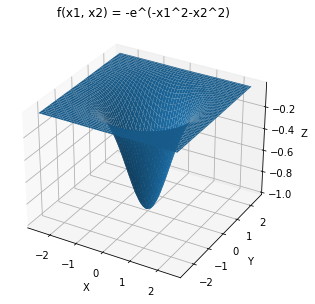

In [238]:
x1 = x2 = np.arange(-2.5, 2.5, 0.05)
X, Y = np.meshgrid(x1, x2)

z_array = np.array([funcao(a, b) for a, b in zip(np.ravel(X), np.ravel(Y))])
Z = z_array.reshape(X.shape)

fig = plt.figure(figsize=[5.0,5.0])
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('f(x1, x2) = -e^(-x1^2-x2^2)')

plt.show()

#### 2. Métodos para obter ponto(s) mínimo(s)

##### Critérios de Parada

Os critérios escolhidos foram:
+ variação dos pontos tendendo a zero;
+ gradiente tendendo a zero;
+ máximo de interações = 1000.


In [239]:
max_iterations = 1000
max_value = 2 ** 64
min_value = 1 / 2 ** 100
irrelevant_delta = 1 / 2 ** 25

##### Método Gradiente

Como o nosso objetivo é minimizar f, a direção de busca deve ser oposta à direção do gradiente no ponto determinado. Em outras palavras, *d = -∇ f(x1, x2)*.

In [240]:
def metodo_gradiente(x1, x2, search_function):
    
    iteration_count = 0
    
    grad_x1, grad_x2 = gradiente(x1, x2)[0][0], gradiente(x1, x2)[1][0]
    variation_x1, variation_x2 = max_value, max_value

    sum_num_calls = 0
    
    while (iteration_count < max_iterations # criterios de parada
           and (abs(grad_x1) > min_value or abs(grad_x2) > min_value)
           and (abs(variation_x1) > irrelevant_delta or abs(variation_x2) > irrelevant_delta)):
            
            direction_x1, direction_x2 = -1 * grad_x1, -1 * grad_x2 # direcao oposta a direcao do gradiente
            t, num_calls = search_function(x1, x2, direction_x1, direction_x2)
            sum_num_calls += num_calls
            
            x0, y0 = x1, x2
            x1, x2 = x1 + t * direction_x1, x2 + t * direction_x2 # novos pontos com a direcao e passo de armijo
            variation_x1, variation_x2 = x1 - x0, x2 - y0
            iteration_count += 1
            grad_x1, grad_x2 = gradiente(x1, x2)[0][0], gradiente(x1, x2)[1][0]
    
    return x1, x2, iteration_count, sum_num_calls

##### Método de Newton

O método de Newton utiliza o polinômio de Taylor de primeira ordem para aproximar o sistema *∇ f(x1, x2) = 0*. Utiliza-se, então, a inversa da matriz Hessiana para determinar a direção de busca.

+ Matriz Inversa

A matriz inversa de A(2x2) é dada por:

![Inversa](./inversa.png)

In [241]:
def matriz_inversa(matriz):
    a, b = matriz[0]
    c, d = matriz[1]
    det = a * d - c * d
    inverse = (1 / det) * np.array([[d, -b], [-c, a]])
    return inverse 

In [242]:
def metodo_newton(x1, x2, search_function):
    
    iteration_count = 0
    
    grad_x1, grad_x2 = gradiente(x1, x2)[0][0], gradiente(x1, x2)[1][0]
    variation_x1, variation_x2 = max_value, max_value
    
    sum_num_calls = 0
    
    while (iteration_count < max_iterations # criterios de parada
           and (abs(grad_x1) > min_value or abs(grad_x2) > min_value)
           and (abs(variation_x1) > irrelevant_delta or abs(variation_x2) > irrelevant_delta)):

            hessian = matriz_hessiana(x1, x2)
            
            if (e_positiva_definida(hessian)): # verifica se a hessiana positiva definida
                
                grad = gradiente(x1,x2) 
                
                # direcao com a inversa da hessiana
                direction_x1, direction_x2 = -1 * matriz_inversa(hessian).dot(grad)
                t, num_calls = search_function(x1, x2, direction_x1, direction_x2)
                sum_num_calls += num_calls
                
                x0, y0 = x1, x2
                x1, x2 = x1 + t * direction_x1, x2 + t * direction_x2
                x1, x2 = x1[0], x2[0]
                variation_x1, variation_x2 = x1 - x0, x2 - y0
                grad_x1, grad_x2 = gradiente(x1, x2)[0][0], gradiente(x1, x2)[1][0]
                iteration_count += 1
            else:
                
                if (iteration_count == 0):
                    print('A Hessiana inicial não uma matriz positiva definida. \
                    \nPoints: {points}\n'.format(points = (x1, x2)))
                break
    
    return x1, x2, iteration_count, sum_num_calls

##### Método de quase-Newton

A ideia do método Quase-Newton é ter um algoritmo menos custoso computacionalmente que o método de Newton, porém que convirja mais rapidamente que o método do Gradiente. Isto é feito utilizando aproximações da inversa da Hessiana a cada iteração para determinar a direção de busca.

Foi utilizado o método BFGS de aproximação, dado por:

![Quase-Newton](./quase-newton.png)

Por convenção, H0 inicial escolhido será a matriz identidade ![Identidade](./identidade.png)

In [243]:
def metodo_quase_newton(x1, x2, search_method): 
    
    iteration_count = 0 
    
    grad_x0 = gradiente(x1, x2)
    x1 = np.array([x1, x2])
    inv_hessian_approx = np.array([[1, 0], [0, 1]]) # matriz identidade
    
    gradient_variation = np.array([[max_value], [max_value]]) # calcula-se tambem a variacao no gradiente
    variation = np.array([[max_value], [max_value]])

    sum_num_calls = 0
    
    while (iteration_count < max_iterations # criterios de parada
        and (abs(grad_x0[0][0]) > min_value or abs(grad_x0[1][0]) > min_value)
        and (abs(variation[0][0]) > irrelevant_delta or abs(variation[1][0]) > irrelevant_delta)):
        
            direction = -1 * inv_hessian_approx.dot(grad_x0) # direcao por hessiana aproximada
            step, num_calls = search_method(x1[0], x1[1], direction[0], direction[1])
            sum_num_calls += num_calls
            
            x0 = x1
            x1 = [x1[0] + step * direction[0][0], x1[1] + step * direction[1][0]]
            variation = np.array([[x1[0] - x0[0], x1[1] - x0[1]]]).transpose()

            grad_x1 = gradiente(x1[0], x1[1])
            gradient_variation = grad_x1 - grad_x0
            grad_x0 = grad_x1
            
            # componentes para montar o metodo BFGS com mais facilidade
            a = 1 + ((gradient_variation.transpose().dot(inv_hessian_approx)).dot(gradient_variation))[0][0] \
                      / ((variation.transpose()).dot(gradient_variation))[0][0]

            b = variation.dot(variation.transpose()) / (variation.transpose().dot(gradient_variation))[0][0]
            
            c = ((variation.dot(gradient_variation.transpose())).dot(inv_hessian_approx) \
                      + inv_hessian_approx.dot(gradient_variation).dot(variation.transpose())) \
                        / ((variation.transpose()).dot(gradient_variation))[0][0]
            
            # aproximacao pelo metodo BFGS
            inv_hessian_approx = inv_hessian_approx + a * b - c
            iteration_count += 1
    
    return x1[0], x1[1], iteration_count, sum_num_calls

##### Busca de Armijo

A busca de Armijo é uma condição utilizada para determinar o quanto andar (passo) em determinada direção de minimização de uma função. O algoritmo é iniciado com o passo t = 1, e a ideia é ir diminuindo este valor a cada iteração, até que seja observado uma diminuição da função objetiva correspondente a diminuição esperada, com base no gradiente local.

In [244]:
def busca_armijo(x, y, direction_x, direction_y):
    penalty = 0.9 # o quanto reduz t a cada iteracao
    control = 0.25 
    dot = lambda x0, y0, x1, y1: x0 * x1 + y0 * y1
    
    grad_x, grad_y = gradiente(x, y)[0][0], gradiente(x, y)[1][0]
    num_calls = 0
    t = 1
    while (funcao(x + t * direction_x, y + t * direction_y)
        > funcao(x, y) + control * t * dot(grad_x, grad_y, direction_x, direction_y)):
            t *= penalty
            num_calls += 1
    
    return t, num_calls

##### Resultados

A função dos resultados utiliza os pontos iniciais x0 e y0 no método escolhido. O erro foi calculado de duas formas, a primeira pelo valor da função objetivo com *xFinal* e *yFinal* como parâmetros, comparado com o valor conhecido do único mínimo global da função, -1, e a segunda pelo módulo do gradiente final da função objetivo.

In [245]:
def gera_resultados(x1, x2, minimize_function, search_function):
    new_x1, new_x2, iteration_count, num_calls = minimize_function(x1, x2, search_function)
    value = funcao(new_x1, new_x2)
    new_grad_x1, new_grad_x2 = gradiente(new_x1,new_x2)[0][0], gradiente(new_x1,new_x2)[1][0]
    absolute = math.sqrt(new_grad_x1 ** 2 + new_grad_x2 ** 2)
    return [x1, x2, iteration_count, num_calls, new_x1, new_x2, value, abs(-1 - value), absolute]

Pontos iniciais escolhidos a partir de testes com valores aleatórios, com Hessiana positiva definida.

O valor ótimo esperado é -1, com *(x, y) = (0, 0)*, no único mínimo da função objetivo.

Algumas observações dos resutados obtidos:

Por conta do comportamento assintótico da função a partir de *(x, y) ~ (1, 1)* e a íngreme descida até o ponto mínimo em *(x, y) = (0, 0)*, algumas escolhas de ponto inicial geram problemas com nossos critérios de parada, pois em um plano assintótico o valor do gradiente é praticamente zero.

In [246]:
count = 1000
points = [
      [-0.7035273268376847,	-0.045702632520210784],
      [-0.49778558517864724, -0.4290901015961204],
      [-0.5547163649779892,	0.33303746037546134],
      [0.21073497288250786,	0.4368996741272806],
      [-0.4072224336563752,	0.5582085516058282],
      [0.6180229982930903,	0.2159972820062741],
      [-0.7035273268376847,	-0.045702632520210784],
      [-0.49778558517864724,	-0.4290901015961204],
      [0.383572372478453,	-0.28211604594836004]
] + [[random.uniform(-10.0, 10.0), random.uniform(-10.0, 10.0)] for _ in range(count)]

points = [point for point in points if e_positiva_definida(matriz_hessiana(point[0], point[1]))]
points = points[:10]

In [247]:
methods = [
    {
        "name": "Gradiente", 
        "func": metodo_gradiente
    },
    {
        "name": "Newton",
        "func": metodo_newton
    },
    {
        "name": "Quase-Newton",
        "func": metodo_quase_newton
    }
]

print("Iniciando...\n")
for method in methods:
    start_time = time.time()
    print("\nMétodo {method_name} + Armijo\n".format(method_name = method["name"]))
    
    lines = [["X0", "Y0", "Iter.", "Search Iter.", "X Opt.", "Y Opt.", "Opt. Value", "Error Abs. Value", "Error Final Grad."]]
    lines += [gera_resultados(point[0], point[1], method["func"], busca_armijo) for point in points]
    
    def format_(val):
      if type(val) == type(0):
        return str(val)
      elif type(val) == type(""):
        return val
      else:
        if abs(val) < 0.000001: return "0" # 10^-6
        return str(round(val, 7))

    display(HTML('<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(format_(val) for val in line)) for line in lines)
    )))
    
    print("\nTempo de execução total: {time} segundos.".format(time = time.time() - start_time))
    print("\nExecutando próximo método...")
    
print("\nFim.\n")

Iniciando...


Método Gradiente + Armijo



X0,Y0,Iter.,Search Iter.,X Opt.,Y Opt.,Opt. Value,Error Abs. Value,Error Final Grad.
-0.7035273,-0.0457026,23,65,0,0,-1.0,0,0
-0.4977856,-0.4290901,23,66,0,0,-1.0,0,0
-0.5547164,0.3330375,23,64,0,0,-1.0,0,0
0.210735,0.4368997,23,65,0,0,-1.0,0,0
-0.4072224,0.5582086,22,63,0,0,-1.0,0,0
0.618023,0.2159973,23,66,0,0,-1.0,0,0
-0.7035273,-0.0457026,23,65,0,0,-1.0,0,0
-0.4977856,-0.4290901,23,66,0,0,-1.0,0,0
0.3835724,-0.282116,23,65,0,0,-1.0,0,0
-0.590006,0.1620261,23,65,0,0,-1.0,0,0



Tempo de execução total: 0.010178565979003906 segundos.

Executando próximo método...

Método Newton + Armijo



X0,Y0,Iter.,Search Iter.,X Opt.,Y Opt.,Opt. Value,Error Abs. Value,Error Final Grad.
-0.7035273,-0.0457026,5,21,0,0,-1.0,0,0
-0.4977856,-0.4290901,5,1,0,0,-1.0,0,0
-0.5547164,0.3330375,6,39,0,0,-1.0,0,0
0.210735,0.4368997,5,0,0,0,-1.0,0,0
-0.4072224,0.5582086,6,20,0,0,-1.0,0,0
0.618023,0.2159973,5,4,0,0,-1.0,0,0
-0.7035273,-0.0457026,5,21,0,0,-1.0,0,0
-0.4977856,-0.4290901,5,1,0,0,-1.0,0,0
0.3835724,-0.282116,5,5,0,0,-1.0,0,0
-0.590006,0.1620261,5,18,0,0,-1.0,0,0



Tempo de execução total: 0.01583099365234375 segundos.

Executando próximo método...

Método Quase-Newton + Armijo



X0,Y0,Iter.,Search Iter.,X Opt.,Y Opt.,Opt. Value,Error Abs. Value,Error Final Grad.
-0.7035273,-0.0457026,6,0,0,0,-1.0,0,0
-0.4977856,-0.4290901,6,0,0,0,-1.0,0,0
-0.5547164,0.3330375,6,0,0,0,-1.0,0,0
0.210735,0.4368997,6,1,0,0,-1.0,0,0
-0.4072224,0.5582086,6,0,0,0,-1.0,0,0
0.618023,0.2159973,6,0,0,0,-1.0,0,0
-0.7035273,-0.0457026,6,0,0,0,-1.0,0,0
-0.4977856,-0.4290901,6,0,0,0,-1.0,0,0
0.3835724,-0.282116,6,1,0,0,-1.0,0,0
-0.590006,0.1620261,6,0,0,0,-1.0,0,0



Tempo de execução total: 0.008996725082397461 segundos.

Executando próximo método...

Fim.

